## Importing Labraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms

### Upload dataset & preprocessing

In [13]:
cancer_data = datasets.load_breast_cancer()
cancer_data.head()

AttributeError: head

In [7]:
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target #training labels (maligne = 0, benine = 1)
X = cancer_data.data   # 30 attributes
X = preprocessing.scale(X) # scale eachd data attributes to zero mean and unit varience 'some models need monotone transformations to the data'
# https://datascience.stackexchange.com/questions/32109/zero-mean-and-unit-variance

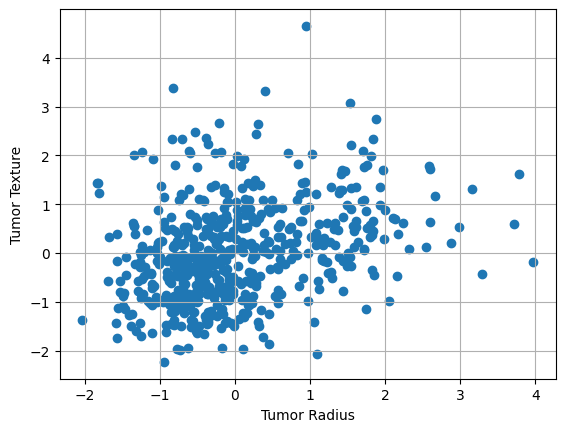

In [17]:
# Plot the first 2 attributes of training points
plt.scatter(X[:, 0], X[:, 1])
# sns.scatterplot(data = [X[:, 0], X[:, 1]], hue=y)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()